# CADENAS DE MARKOV

### Importación de librerías

In [82]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

### Solicitud de número de usuarios

In [83]:
usuario = int(input("\nNúmero de usuarios: "))

### Variables empleadas

In [84]:
columnas = filas = usuario
matriz = []

### Inicialización de las variables de probabilidad establecidas

In [85]:
pro_conectado = 0.4
pro_desconectado = 0.3

### Definición de la ecuación binomial

In [86]:
def binomial(x, n, p):
    factoriales = math.comb(n, x)
    probabilidades = p**x * (1-p)**(n-x)
    return probabilidades * factoriales

### Ciclos y condiciones para el cálculo de las probabilidades de la matriz

In [87]:
for i in range(filas+1):
    fila = []
    for j in range(columnas+1):
        if i == 0:
            fila.append(binomial(j, filas, pro_conectado))
        elif j == 0 and i != filas:
            fila.append(binomial(j+i, i, pro_desconectado) * binomial(j, filas-i, pro_conectado))
        elif j < i and j != 0 and i != filas:
            fila.append(binomial(j, i, pro_desconectado))
        elif j == i and i != filas:
            fila.append(binomial(j, i, pro_desconectado) * binomial(j, i, pro_conectado) + 
            binomial(0, i, pro_desconectado) * binomial(0, filas-i, pro_conectado))
        elif j > i and i != filas:
            fila.append(binomial(0, i, pro_desconectado) * binomial(j-i, filas-i, pro_conectado))
        elif i == filas:
            fila.append(binomial(i-j, filas, pro_desconectado))
            
    #Normalizar la fila para que la suma de las probabilidades sea igual a 1.0
    suma = sum(fila)
    fila = [x/suma for x in fila]
    matriz.append(fila)

### Impresión de la matriz de transición

In [88]:
matriz1 = np.array(matriz)

print("Matriz de transición:\n\n", matriz1)

Matriz de transición:

 [[2.79936000e-02 1.30636800e-01 2.61273600e-01 2.90304000e-01
  1.93536000e-01 7.74144000e-02 1.72032000e-02 1.63840000e-03]
 [1.67827982e-02 1.83045307e-01 1.56639450e-01 2.61065750e-01
  2.32058444e-01 1.16029222e-01 3.09411259e-02 3.43790288e-03]
 [7.51386303e-03 4.50934852e-01 5.63694333e-02 1.36362699e-01
  1.81816932e-01 1.21211288e-01 4.04037628e-02 5.38716837e-03]
 [3.57708312e-03 4.50815516e-01 1.93206650e-01 4.72086648e-02
  1.21179211e-01 1.21179211e-01 5.38574270e-02 8.97623783e-03]
 [1.76041430e-03 4.14144104e-01 2.66235495e-01 7.60672844e-02
  5.23907988e-02 1.04364314e-01 6.95762094e-02 1.54613799e-02]
 [8.76140773e-04 3.60701988e-01 3.09173133e-01 1.32502771e-01
  2.83934510e-02 6.06228554e-02 8.07972454e-02 2.69324151e-02]
 [4.37526276e-04 3.02613338e-01 3.24228577e-01 1.85273473e-01
  5.95521876e-02 1.02089464e-02 7.06127658e-02 4.70731860e-02]
 [2.18700000e-04 3.57210000e-03 2.50047000e-02 9.72405000e-02
  2.26894500e-01 3.17652300e-01 2.47062

### Suma de las probabilidades de cada fila

In [89]:
print("\nSuma de las probabilidades de cada fila:\n")

for i in range(filas+1):
    acu = np.sum(matriz1[i])
    print("|", end="")
    for j in range(columnas+1):
        print("p{}{} = {:.3f} | ".format(i, j, matriz1[i][j]), end="")
    print("\033[0;32m--> TOTAL: {:.1f}\033[0;m".format(acu))
    print()


Suma de las probabilidades de cada fila:

|p00 = 0.028 | p01 = 0.131 | p02 = 0.261 | p03 = 0.290 | p04 = 0.194 | p05 = 0.077 | p06 = 0.017 | p07 = 0.002 | --> TOTAL: 1.0

|p10 = 0.017 | p11 = 0.183 | p12 = 0.157 | p13 = 0.261 | p14 = 0.232 | p15 = 0.116 | p16 = 0.031 | p17 = 0.003 | --> TOTAL: 1.0

|p20 = 0.008 | p21 = 0.451 | p22 = 0.056 | p23 = 0.136 | p24 = 0.182 | p25 = 0.121 | p26 = 0.040 | p27 = 0.005 | --> TOTAL: 1.0

|p30 = 0.004 | p31 = 0.451 | p32 = 0.193 | p33 = 0.047 | p34 = 0.121 | p35 = 0.121 | p36 = 0.054 | p37 = 0.009 | --> TOTAL: 1.0

|p40 = 0.002 | p41 = 0.414 | p42 = 0.266 | p43 = 0.076 | p44 = 0.052 | p45 = 0.104 | p46 = 0.070 | p47 = 0.015 | --> TOTAL: 1.0

|p50 = 0.001 | p51 = 0.361 | p52 = 0.309 | p53 = 0.133 | p54 = 0.028 | p55 = 0.061 | p56 = 0.081 | p57 = 0.027 | --> TOTAL: 1.0

|p60 = 0.000 | p61 = 0.303 | p62 = 0.324 | p63 = 0.185 | p64 = 0.060 | p65 = 0.010 | p66 = 0.071 | p67 = 0.047 | --> TOTAL: 1.0

|p70 = 0.000 | p71 = 0.004 | p72 = 0.025 | p73 = 0.097

### Gráfica de la matriz de transición

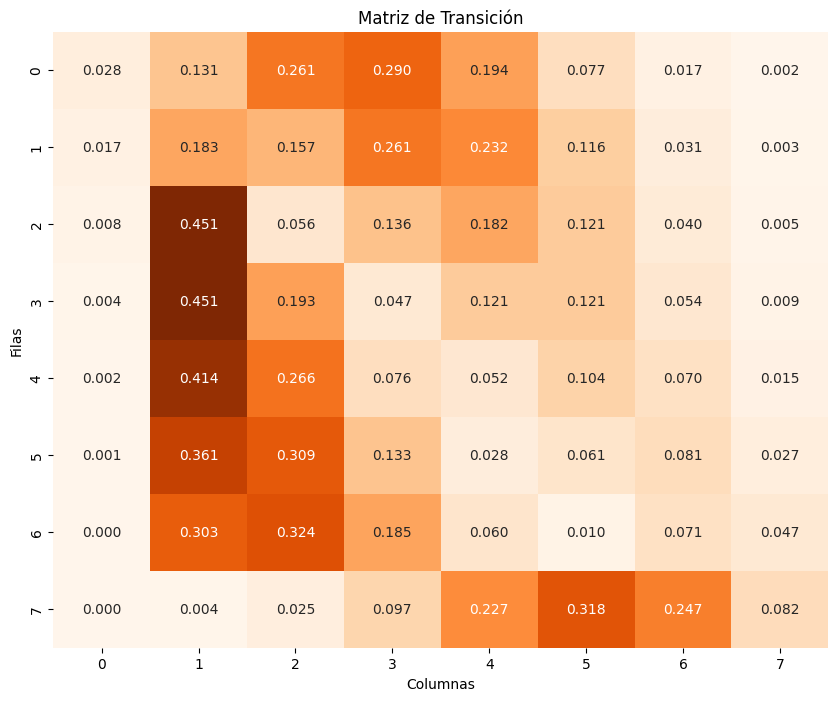

In [90]:
plt.figure(figsize=(10, 8))
sns.heatmap(matriz1, annot=True, cmap="Oranges", fmt=".3f", cbar=False)
plt.xlabel('Columnas')
plt.ylabel('Filas')
plt.title('Matriz de Transición')
plt.show()